<a href="https://colab.research.google.com/github/Boyiritushar/netflix-project/blob/main/netflix_bt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# Basic exploration
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())
print("\nInfo:")
print(df.info())

# Preview first 5 rows
df.head()


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv
Shape of dataset: (7787, 12)

Columns in dataset: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Check missing values
df.isnull().sum()

# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
# Drop columns with too many nulls
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")


In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Separate Movie duration (minutes) and TV Show seasons
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Create dummy variable for type (Movie=0, TV Show=1)
df['type_num'] = df['type'].apply(lambda x: 0 if x == "Movie" else 1)


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3937885646.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Combine important text columns into one
df['text_data'] = (
    df['title'].fillna('') + ' ' +
    df['director'].fillna('') + ' ' +
    df['cast'].fillna('') + ' ' +
    df['country'].fillna('') + ' ' +
    df['listed_in'].fillna('') + ' ' +
    df['description'].fillna('')
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # limit to 5000 features for efficiency
X = tfidf.fit_transform(df['text_data'])

print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (7787, 5000)


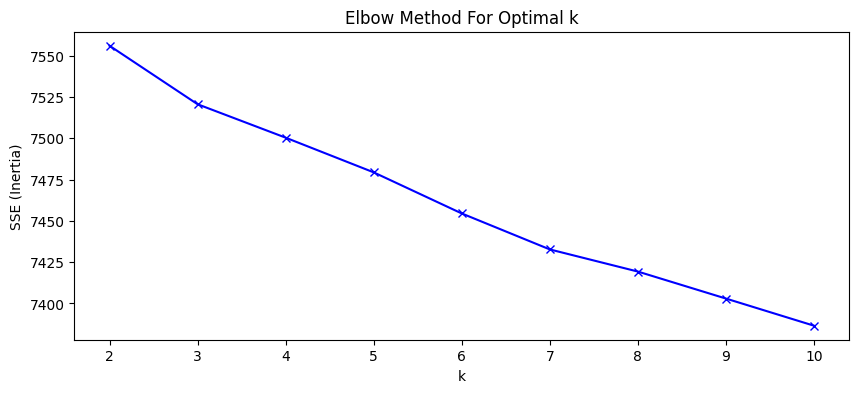

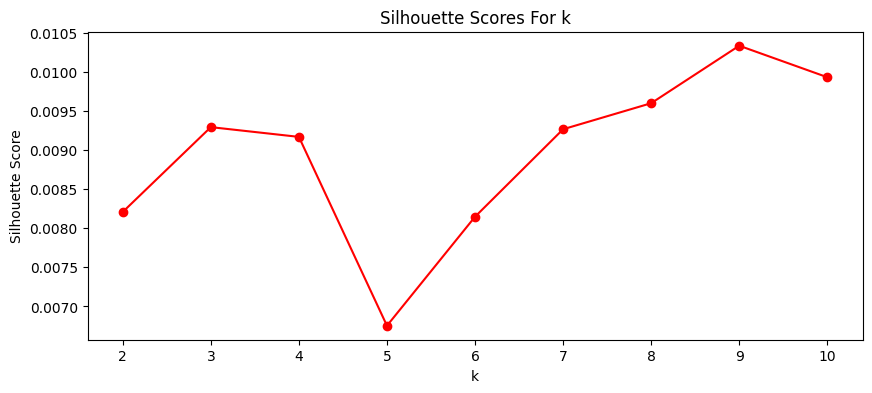

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
sse = []
silhouette_scores = []
K = range(2, 11)  # Trying 2 to 10 clusters

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X, km.labels_))

# Plot SSE (Elbow Method)
plt.figure(figsize=(10,4))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,4))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For k')
plt.show()


In [ ]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

df[['title', 'type', 'listed_in', 'cluster']].head(20)


,title,type,listed_in,cluster
0,3%,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",1
1,7:19,Movie,"Dramas, International Movies",0
2,23:59,Movie,"Horror Movies, International Movies",0
3,9,Movie,"Action & Adventure, Independent Movies, Sci-Fi...",4
4,21,Movie,Dramas,4
5,46,TV Show,"International TV Shows, TV Dramas, TV Mysteries",1
6,122,Movie,"Horror Movies, International Movies",0
7,187,Movie,Dramas,4
8,706,Movie,"Horror Movies, International Movies",3
9,1920,Movie,"Horror Movies, International Movies, Thrillers",3


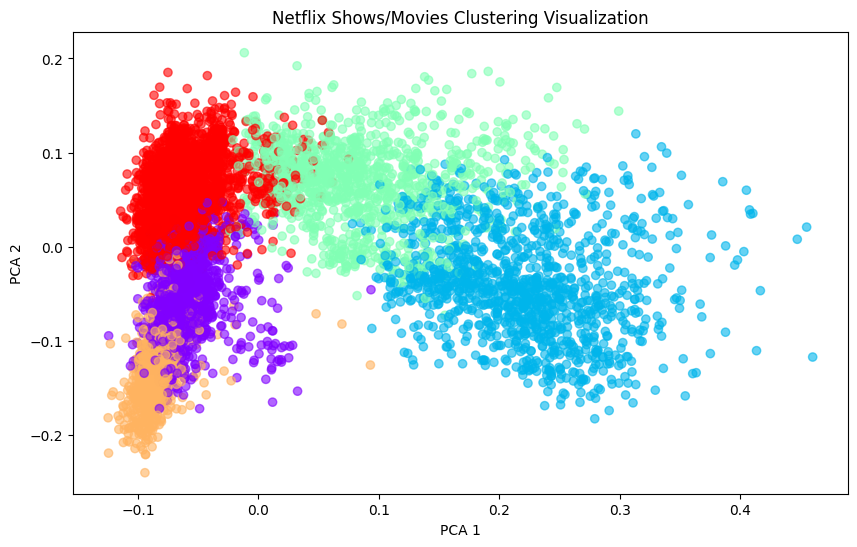

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,6))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=df['cluster'], cmap='rainbow', alpha=0.6)
plt.title("Netflix Shows/Movies Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
# Cluster distribution
print(df['cluster'].value_counts())

# Most common genres in each cluster
for i in range(best_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i} Top Genres:")
    print(cluster_data['listed_in'].value_counts().head(5))


cluster
4    3069
0    1498
1    1224
2    1077
3     919
Name: count, dtype: int64

Cluster 0 Top Genres:
listed_in
Dramas, International Movies                        180
Comedies, International Movies                      131
Comedies, Dramas, International Movies              116
Comedies, International Movies, Romantic Movies      98
Dramas, Independent Movies, International Movies     96
Name: count, dtype: int64

Cluster 1 Top Genres:
listed_in
Crime TV Shows, International TV Shows, TV Dramas             106
International TV Shows, TV Dramas                             104
International TV Shows, Romantic TV Shows, TV Dramas           86
International TV Shows, Romantic TV Shows, TV Comedies         79
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: count, dtype: int64

Cluster 2 Top Genres:
listed_in
Kids' TV                                204
Kids' TV, TV Comedies                    89
Reality TV                               81
Anime Series, Internati